#Identifikasi Kematangan Buah Tomat Menggunakan Convolution Neural Network

LATAR BELAKANG


Tomat merupakan buah yang masih tergolong dalam kerabat terong, kentang dan paprika yang memiliki nama latin Lycopersicum  esculentum  Mill. Buah
tomat dikenal juga dengan buah yang tidak mengenal musim dan memiliki ketersediaan gizi yang cukup baik bagi
tubuh. Buah pepaya dipercaya dapat membantu proses pencernaan pada tubuh. Tingkat kematangan buah tomat ada 3
yaitu mentah, setengah matang, dan matang.
  
  Tomat memiliki banyak manfaat, yaitu antara lain adalah
sebagai bahan makanan sehari-hari, sebagai sayuran, bumbu masak, buah meja,
bahan pewarna, kosmetik, serta bahan baku pengolahan makanan seperti saus, sari
buah, dan lain-lain. Oleh sebab itu, tomat menjadi salah satu sayuran yang
multiguna sehingga memiliki nilai ekonomi yang tinggi (Nurhayati, 2017).

  Tomat  (Lycopersicum  esculentum  Mill.) merupakan salah satu  komoditas  hortikultura  yang  bernilai  ekonomi  tinggi. Tomat adalah  salah  satu  komoditas  sayuran  yang  sangat potensial  untuk  dikembangkan.  Tanaman  ini  dapat  ditanam secara  luas  di  dataran  rendah  maupun  dataran  tinggi. Produksi  tomat  di  Indonesia  sangat  tinggi,  buktinya  pada tahun  2019  produksi  tomat  mencapai  angka  1,020,333  tons (BPS, 2019).

Dengan tingginya produksi tomat dan pada industri produksi tomat terdapat sebuah proses pensortiran yang biasanya/ pada umumnya dilakukan secara manual dengan menggunakan panca indera pengelihatan dengan melihat warna pada tomat tersebut, seperti yang diketahui manusai memiliki kekurangan penilaian yang bersifat subjektif sehingga hasil sortir antar individu tentunya akan berbeda- beda yang bisa saja dipengaruhi oleh faktor kurangnya konsentrasi, dan rasa lelah. Dengan perkembangan zaman teknologi komputerisasi, muncul sebuah teknik mengenali atau mengidentifikasi suatu citra yakni membedakan sebuah object dengan menggunakan pendekatan AI.

PROBLEM SCOPING

Who :
- Pengusaha dan petani buah tomat

What : 
- Projek ini merupakan projek untuk mengidentifikasi tingkat kematangan pada buah tomat yaitu matang, mengkal, dan masih belum matang/muda.
Masih terdapat kekeliruan terhadap membedakan kematangan buah tomat yang berimbas salahnya proses pengidentifikasian.


Where : 
- Perusahaan/ Industri produksi tomat

Why : 
- tingginya produksi tomat dan pada industri produksi tomat terdapat sebuah proses pensortiran yang dilakukan secara manual sehingga sering terjadi kesalahan dalam penilaian subjektif

COLLAB DATA SCRAPING :

https://colab.research.google.com/drive/1C8Xi08dLkQSJP5OA1ZmsukuLmqZqj3yR?usp=sharing#scrollTo=4dJlulxVQDai

LINK KAGGLE :

https://www.kaggle.com/datasets/igedeindraaryasa/dataset-gambar


In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import tensorflow as tf
from tensorflow import keras

In [6]:
!kaggle datasets download -d igedeindraaryasa/tomatoes-ripe

 96% 129M/134M [00:06<00:00, 31.5MB/s]
100% 134M/134M [00:06<00:00, 21.7MB/s]


In [7]:
!unzip  '/content/tomatoes-ripe' -d '/content/tomatoes-ripe'

Archive:  /content/tomatoes-ripe.zip
  inflating: /content/tomatoes-ripe/content/dataset_gambar/tomato fully-ripe/Image_1.jpg  
  inflating: /content/tomatoes-ripe/content/dataset_gambar/tomato fully-ripe/Image_10.png  
  inflating: /content/tomatoes-ripe/content/dataset_gambar/tomato fully-ripe/Image_100.jpg  
  inflating: /content/tomatoes-ripe/content/dataset_gambar/tomato fully-ripe/Image_101.jpg  
  inflating: /content/tomatoes-ripe/content/dataset_gambar/tomato fully-ripe/Image_102.jpg  
  inflating: /content/tomatoes-ripe/content/dataset_gambar/tomato fully-ripe/Image_103.jpg  
  inflating: /content/tomatoes-ripe/content/dataset_gambar/tomato fully-ripe/Image_104.jpg  
  inflating: /content/tomatoes-ripe/content/dataset_gambar/tomato fully-ripe/Image_105.jpg  
  inflating: /content/tomatoes-ripe/content/dataset_gambar/tomato fully-ripe/Image_106.jpg  
  inflating: /content/tomatoes-ripe/content/dataset_gambar/tomato fully-ripe/Image_107.JPG  
  inflating: /content/tomatoes-ripe/

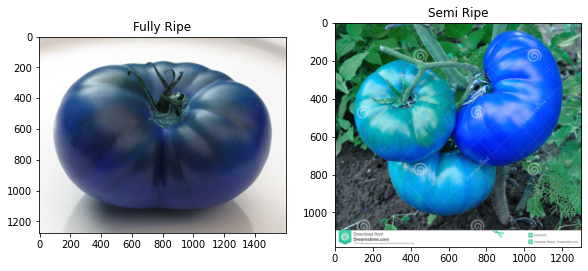

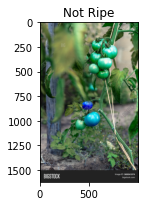

In [8]:
plt.figure(figsize = (15, 15))
fllyrpd_img = cv2.imread('/content/tomatoes-ripe/content/dataset_gambar/tomato fully-ripe/Image_31.jpg')
smirpd_img = cv2.imread('/content/tomatoes-ripe/content/dataset_gambar/tomato semi-ripe/Image_10.jpg')
nrpd_img = cv2.imread('/content/tomatoes-ripe/content/dataset_gambar/tomato unripe/Image_31.jpg')
plt.subplot(1, 3, 1)
plt.imshow(fllyrpd_img)
plt.title('Fully Ripe')
plt.subplot(1, 3, 2)
plt.imshow(smirpd_img)
plt.title('Semi Ripe')
plt.show()
plt.subplot(1, 3, 3)
plt.imshow(nrpd_img)
plt.title('Not Ripe')
plt.show()

In [9]:
import zipfile
import os
import glob 
import warnings

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

from keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#DATA AUGMENTATION

In [10]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

import os
print(os.getcwd())
os.chdir('/content/tomatoes-ripe/content/dataset_gambar/tomato fully-ripe')
print(os.getcwd())

for path in os.listdir():
  img = load_img(f'{path}')
  x = img_to_array(img)
  x = x.reshape((1,) + x.shape)
  i = 0
  for batch in datagen.flow(x, batch_size=1,
                            save_to_dir=".", save_prefix="img", save_format='jpeg'):
    i += 1
    if i > 10:
      break

/content
/content/tomatoes-ripe/content/dataset_gambar/tomato fully-ripe


In [11]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

import os
print(os.getcwd())
os.chdir('/content/tomatoes-ripe/content/dataset_gambar/tomato semi-ripe')
print(os.getcwd())

for path in os.listdir():
  img = load_img(f'{path}')
  x = img_to_array(img)
  x = x.reshape((1,) + x.shape)
  i = 0
  for batch in datagen.flow(x, batch_size=1,
                            save_to_dir=".", save_prefix="img", save_format='jpeg'):
    i += 1
    if i > 10:
      break

/content/tomatoes-ripe/content/dataset_gambar/tomato fully-ripe
/content/tomatoes-ripe/content/dataset_gambar/tomato semi-ripe


In [12]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

import os
print(os.getcwd())
os.chdir('/content/tomatoes-ripe/content/dataset_gambar/tomato unripe')
print(os.getcwd())

for path in os.listdir():
  img = load_img(f'{path}')
  x = img_to_array(img)
  x = x.reshape((1,) + x.shape)
  i = 0
  for batch in datagen.flow(x, batch_size=1,
                            save_to_dir=".", save_prefix="img", save_format='jpeg'):
    i += 1
    if i > 10:
      break

/content/tomatoes-ripe/content/dataset_gambar/tomato semi-ripe
/content/tomatoes-ripe/content/dataset_gambar/tomato unripe


In [13]:
!mkdir tomatoes-ripe
!ls tomatoes-ripe

In [14]:
import os

dataset = os.path.join('/content/tomatoes-ripe/content/dataset_gambar')

print(os.listdir(dataset))

['tomato semi-ripe', 'tomato unripe', 'tomato fully-ripe']


In [15]:
data = ['tomato unripe', 'tomato fully-ripe', 'tomato semi-ripe']

for data in data:
    print(f'{data} images: ', len(os.listdir(f'/content/tomatoes-ripe/content/dataset_gambar/{data}')))

    total_image = len(list(glob.iglob("/content/tomatoes-ripe/content/dataset_gambar/*/*.*", recursive=True)))
print("Total Data Image JPEG     : ",total_image)

tomato unripe images:  1680
tomato fully-ripe images:  1687
tomato semi-ripe images:  1670
Total Data Image JPEG     :  5036


In [16]:
import shutil
base_dir = '/content/tomatoes-ripe/content/dataset_gambar'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [17]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    zoom_range=0.4,
                    shear_range = 0.2,
                    brightness_range = [0,1],
                    horizontal_flip=True,
                    vertical_flip= True,
                    fill_mode = 'nearest',
                    validation_split = 0.2) #membagi validation set 20%

In [18]:
train_generator = datagen.flow_from_directory(                           
	        base_dir,                                                                      
	        target_size=(150,150),                                                          
	        class_mode='categorical',                                                       
          shuffle=True,                                                                   
          subset='training'                                                              
          )

validation_generator = datagen.flow_from_directory(                      
	      base_dir,                                                                     
	      target_size=(150,150),                                                          
	      class_mode='categorical',                                                      
        shuffle=True,
        subset='validation'                                                            
        )

Found 4029 images belonging to 3 classes.
Found 1005 images belonging to 3 classes.


In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dropout(0.1),                                                  #menambahkan dropout
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [20]:
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
tb_callback = tf.keras.callbacks.TensorBoard(
    log_dir='logs', histogram_freq=0, write_graph=True, write_images=False,
    update_freq='epoch', embeddings_freq=0,
    embeddings_metadata=None
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 500,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/500
25/25 - 71s - loss: 1.1211 - accuracy: 0.3651 - val_loss: 1.0964 - val_accuracy: 0.3938 - 71s/epoch - 3s/step
Epoch 2/500
25/25 - 68s - loss: 1.0588 - accuracy: 0.4103 - val_loss: 1.0443 - val_accuracy: 0.4313 - 68s/epoch - 3s/step
Epoch 3/500
25/25 - 71s - loss: 1.0683 - accuracy: 0.4363 - val_loss: 1.0814 - val_accuracy: 0.3938 - 71s/epoch - 3s/step
Epoch 4/500
25/25 - 70s - loss: 1.0663 - accuracy: 0.4375 - val_loss: 1.0658 - val_accuracy: 0.4313 - 70s/epoch - 3s/step
Epoch 5/500
25/25 - 68s - loss: 1.0598 - accuracy: 0.4525 - val_loss: 1.0297 - val_accuracy: 0.4750 - 68s/epoch - 3s/step
Epoch 6/500
25/25 - 70s - loss: 1.0603 - accuracy: 0.4475 - val_loss: 1.0111 - val_accuracy: 0.4437 - 70s/epoch - 3s/step
Epoch 7/500
25/25 - 68s - loss: 1.0233 - accuracy: 0.4605 - val_loss: 1.0117 - val_accuracy: 0.4437 - 68s/epoch - 3s/step
Epoch 8/500
25/25 - 69s - loss: 1.0347 - accuracy: 0.4693 - val_loss: 1.0412 - val_accuracy: 0.4187 - 69s/epoch - 3s/step
Epoch 9/500
25/25 - 68s 

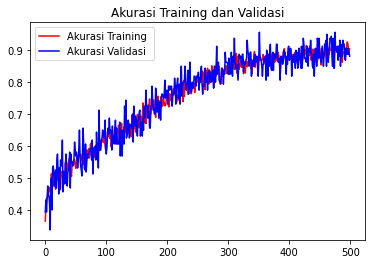

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                  
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.figure()                                                                      
plt.show()

In [23]:
# study of decay rate on accuracy for blobs problem
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot

In [24]:
# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

In [25]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, lrate):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(lr=lrate)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=2)
	# plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.title('lrate='+str(lrate), pad=-50)

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Streaming output truncated to the last 5000 lines.
Epoch 1/500
16/16 - 1s - loss: 2.2092 - accuracy: 0.3820 - val_loss: 1.1506 - val_accuracy: 0.5320 - 567ms/epoch - 35ms/step
Epoch 2/500
16/16 - 0s - loss: 1.2092 - accuracy: 0.4920 - val_loss: 1.0155 - val_accuracy: 0.6140 - 73ms/epoch - 5ms/step
Epoch 3/500
16/16 - 0s - loss: 1.1145 - accuracy: 0.5500 - val_loss: 0.9649 - val_accuracy: 0.6260 - 77ms/epoch - 5ms/step
Epoch 4/500
16/16 - 0s - loss: 1.0723 - accuracy: 0.5700 - val_loss: 0.9339 - val_accuracy: 0.6360 - 69ms/epoch - 4ms/step
Epoch 5/500
16/16 - 0s - loss: 1.0434 - accuracy: 0.5800 - val_loss: 0.9160 - val_accuracy: 0.6400 - 76ms/epoch - 5ms/step
Epoch 6/500
16/16 - 0s - loss: 1.0145 - accuracy: 0.5900 - val_loss: 0.8999 - val_accuracy: 0.6540 - 113ms/epoch - 7ms/step
Epoch 7/500
16/16 - 0s - loss: 0.9982 - accuracy: 0.5840 - val_loss: 0.8798 - val_accuracy: 0.6520 - 79ms/epoch - 5ms/step
Epoch 8/500
16/16 - 0s - loss: 0.9771 - accuracy: 0.5780 - val_loss: 0.8666 - val_acc

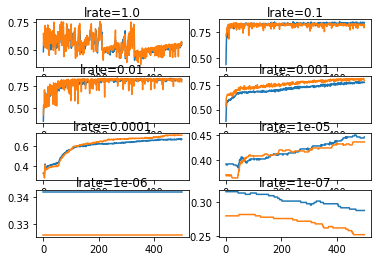

In [26]:
# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
	# determine the plot number
	plot_no = 420 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a learning rate
	fit_model(trainX, trainy, testX, testy, learning_rates[i])
# show learning curves
pyplot.show()

In [27]:
from tensorflow.keras.layers import ReLU, Input, Dense
from keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
from tensorflow.keras.models import Model

n_inputs = 100

In [28]:
# define encoder
visible = Input(shape=(n_inputs,))

In [29]:
# encoder level 1
e = Dense(300)(visible)
e = ReLU()(e)
e = Dropout(0.05)(e)

In [30]:
# encoder level 1
e = Dense(200)(visible)
e = ReLU()(e)
e = Dropout(0.05)(e)

In [31]:
# encoder level 1
e = Dense(100)(visible)
e = ReLU()(e)
e = Dropout(0.05)(e)

In [32]:
# encoder level 1
e = Dense(50)(visible)
e = ReLU()(e)
e = Dropout(0.05)(e)

In [33]:
# bottleneck
n_bottleneck = round(float(n_inputs))
bottleneck = Dense(n_bottleneck)(e)

In [34]:
# define decoder, level 1
# encoder level 1
d = Dense(50)(bottleneck)
d = ReLU()(d)
d = Dropout(0.05)(d)

In [35]:
d = Dense(100)(bottleneck)
d = ReLU()(d)
d = Dropout(0.05)(d)

In [36]:
d = Dense(200)(bottleneck)
d = ReLU()(d)
d = Dropout(0.05)(d)

In [37]:
d = Dense(300)(bottleneck)
d = ReLU()(d)
d = Dropout(0.05)(d)

In [38]:
# output layer
output = Dense(n_inputs, activation='sigmoid')(d)

In [39]:
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)

In [40]:
# Compile before plotting
encoder.compile(optimizer='adam', loss='binary_crossentropy')

In [41]:
# save the encoder to file
encoder.save('/content/drive/MyDrive/saved models/ripeness tomato.h5')

Saving 1c627b02-a3e0-43fd-8a45-0a89794c791a.jpg to 1c627b02-a3e0-43fd-8a45-0a89794c791a.jpg
1c627b02-a3e0-43fd-8a45-0a89794c791a.jpg
fully-ripe


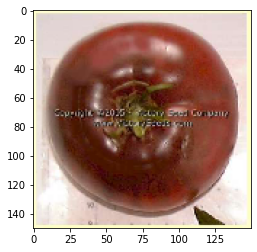

In [42]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('fully-ripe')
  elif classes[0,1]!=0:
    print('semi-ripe')
  else:
    print('unripe')

In [43]:
model_json=model.to_json()
with open("model.json","w") as file:
  file.write(model_json)
model.save_weights("ripeness tomato.h5")
print("SUCCESSFULL model is SAVED !")

SUCCESSFULL model is SAVED !


In [44]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved models/ripeness tomato.h5')